In [1]:
# Importing Qiskit libraries
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Load IBM Quantum account
service = QiskitRuntimeService(channel="ibm_quantum")

In [2]:
# Create a new circuit with two qubits (first argument)  and two classical bits (second argument)
qc = QuantumCircuit(2, 2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Measure qubit 0 to cbit 0, and qubit 1 to cbit 1
qc.measure(0, 0)
qc.measure(1, 1)

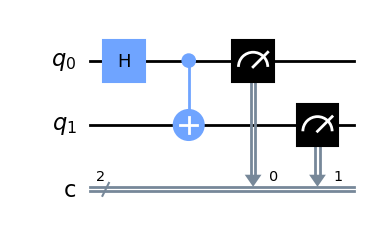

In [3]:
# Return a drawing of the circuit (add "mpl" arg for MatPlotLib)
# Without, "mpl" argument, get a text drawing.
qc.draw("mpl")

In [4]:
# Run on the least-busy backend
backend = service.least_busy(simulator=False, operational=True)

# Create a Sampler object
sampler = Sampler(backend)
 
# Submit the circuit qc to the sampler
job = sampler.run(qc)

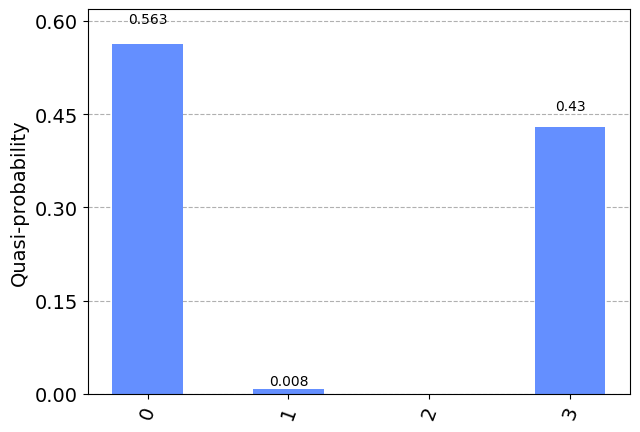

In [5]:
# plot quasi-probabilities
plot_histogram(
    job.result().quasi_dists
)